## Linear Separation in a Subspace

## Result Plot

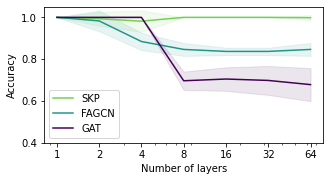

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

y = [1,2,4,8,16,32,64]


mean_accs = np.array([
    [1.0000, 0.9933, 0.9817, 1.0000, 1.0000, 1.0000, 0.9983], #SKP
    [1.0000, 0.9830, 0.8845, 0.8466, 0.8371, 0.8371, 0.8466], #FAGCN
    [1.0000, 1.0000, 1.0000, 0.6967, 0.7050, 0.6983, 0.6783]  #GAT
])

std = np.array([
    [0.0000, 0.0330, 0.0513, 0.0000, 0.0000, 0.0000, 0.0118],
    [0.0000, 0.0495, 0.0411, 0.0309, 0.0176, 0.0176, 0.0309],
    [0.0000, 0.0000, 0.0000, 0.0438, 0.0564, 0.0692, 0.0790]  #GAT
])
    
plt.figure(figsize=(5,2.5))
plt.plot(y, mean_accs[0], color='#73D055', label="SKP")
plt.plot(y, mean_accs[1], color='#1F968B', label="FAGCN")
plt.plot(y, mean_accs[2], color='#440154', label="GAT")

plt.fill_between(y, mean_accs[0] - std[0], mean_accs[0] + std[0], alpha=0.1, color='#73D055')
plt.fill_between(y, mean_accs[1] - std[1], mean_accs[1] + std[1], alpha=0.1, color='#1F968B')
plt.fill_between(y, mean_accs[2] - std[2], mean_accs[2] + std[2], alpha=0.1, color='#440154')

plt.ylim([0.4,1.05])
plt.xscale('log')
plt.xticks([1,2,4,8,16,32,64],[1,2,4,8,16,32,64])
plt.ylabel('Accuracy')
plt.xlabel('Number of layers')
plt.legend()

plt.savefig('er_results.svg',bbox_inches='tight')
plt.show()

## Loss curves

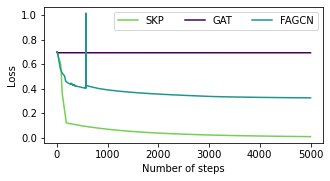

In [14]:
import numpy as np
import matplotlib.pyplot as plt

skp_losses = np.loadtxt('./results/loss_skp.txt')
gat_losses = np.loadtxt('./results/loss_gat.txt')
fagcn_losses = np.loadtxt('./results/loss_fagcn.txt')
y = np.arange(5001)

plt.figure(figsize=(5,2.5))
plt.plot(y, skp_losses, label='SKP', color='#73D055')
plt.plot(y, gat_losses, label='GAT', color='#440154')
plt.plot(y, fagcn_losses, label='FAGCN', color='#1F968B')
plt.legend(ncol=3)
plt.xlabel('Number of steps')
plt.ylabel('Loss')
plt.savefig('er_loss_8.svg',bbox_inches='tight')
plt.show()

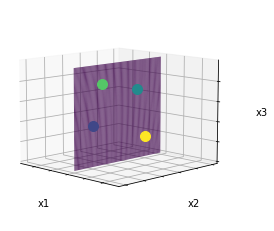

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_array_slices(array):
    min_val = array.min()
    max_val = array.max()
    n_x, n_y, n_z = array.shape
    colormap = plt.cm.YlOrRd

    Y, Z = np.mgrid[0:n_y, 0:n_z]
    X = n_x//2 * np.ones((n_y, n_z))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, shade=True, alpha=0.8, zorder=1, color='#440154')#, facecolors=colormap((z_cut-min_val)/(max_val-min_val))
    
    ax.plot([50],[20],[40], '.', c='#404788', markersize=20, label='top', zorder=4)
    ax.plot([50],[70],[70], '.', c='#238A8D', markersize=20, label='top', zorder=4)
    ax.plot([50],[30],[80], '.', c='#55C667', markersize=20, label='top', zorder=4)
    ax.plot([50],[80],[20], '.', c='#FDE725', markersize=20, label='top', zorder=4)
    
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    
    ax.view_init(elev=10, azim=-45)
    plt.savefig(f'subspace.svg', transparent = True, bbox_inches='tight')
    plt.show()


n_pts = 100
r_square = (np.mgrid[-1:1:1j*n_pts, -1:1:1j*n_pts, -1:1:1j*n_pts]**2).sum(0)
plot_3D_array_slices(r_square)